<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

> Check this GitHub repository:

> https://github.com/elzhawidatama/gitklasa_elzhawidatama

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Data taken from https://data.cityofnewyork.us/Housing-Development/Electric-Consumption-And-Cost-2010-April-2020-/jr24-e7cr

In [2]:
nyc_df = pd.read_csv('Electric_Consumption_And_Cost__2010_-_April_2020_.csv')

C:\Users\MSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Display top 7 rows of the dataframe in your notebook

In [3]:
pd.set_option('display.max_columns', 27)

In [4]:
nyc_df.head(7)

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1842037,2010-01,12/24/2009,01/26/2010,33.0,7223256,N,"15,396.82",GOV/NYC/068,Yes,"128,800","7,387.97",216,"2,808","5,200.85"
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1844205,2010-02,01/26/2010,02/25/2010,30.0,7223256,N,"14,556.34",GOV/NYC/068,Yes,"115,200","6,607.87",224,"2,912","5,036.47"
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1841378,2010-03,02/25/2010,03/26/2010,29.0,7223256,N,"13,904.98",GOV/NYC/068,Yes,"103,200","5,919.55",216,"2,808","5,177.43"
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1847148,2010-04,03/26/2010,04/26/2010,31.0,7223256,N,"14,764.04",GOV/NYC/068,Yes,"105,600","6,057.22",208,"2,704","6,002.82"
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1848672,2010-05,04/26/2010,05/24/2010,28.0,7223256,N,"13,729.54",GOV/NYC/068,Yes,"97,600","5,598.34",216,"2,808","5,323.2"
5,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1850070,2010-06,05/24/2010,06/23/2010,30.0,7223256,N,"16,689.19",GOV/NYC/068,Yes,"124,000","7,112.64",240,"3,120","6,456.55"
6,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1853250,2010-07,06/23/2010,07/23/2010,30.0,7223256,N,"20,563.52",GOV/NYC/068,Yes,"156,000","8,948.16",296,"3,848","7,767.36"


## Dataset preprocessing

Check data type of each column

In [5]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362630 entries, 0 to 362629
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    361947 non-null  object 
 1   Borough             362630 non-null  object 
 2   Account Name        362630 non-null  object 
 3   Location            353112 non-null  object 
 4   Meter AMR           362476 non-null  object 
 5   Meter Scope         19106 non-null   object 
 6   TDS #               360690 non-null  float64
 7   EDP                 362630 non-null  int64  
 8   RC Code             362630 non-null  object 
 9   Funding Source      362630 non-null  object 
 10  AMP #               360744 non-null  object 
 11  Vendor Name         362630 non-null  object 
 12  UMIS BILL ID        362630 non-null  int64  
 13  Revenue Month       362630 non-null  object 
 14  Service Start Date  362622 non-null  object 
 15  Service End Date    362622 non-nul

Remove comma from string of numbers, then convert it to float type

In [6]:
for i in range(22,27):
    nyc_df.iloc[:, i] = nyc_df.iloc[:, i].str.replace(',', '').astype(float)
nyc_df.iloc[:, 19] = nyc_df.iloc[:, 19].str.replace(',', '').astype(float)

Convert date and time data to datetime64[ns] type

In [7]:
nyc_df['Revenue Month'] = pd.to_datetime(nyc_df['Revenue Month'], format = '%Y-%m')
nyc_df['Service Start Date'] = pd.to_datetime(nyc_df['Service Start Date'], format = '%m/%d/%Y')
nyc_df['Service End Date'] = pd.to_datetime(nyc_df['Service End Date'], format = '%m/%d/%Y')

Display top 7 rows of the dataframe

In [8]:
nyc_df.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1842037,2010-01-01,2009-12-24,2010-01-26,33.0,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1844205,2010-02-01,2010-01-26,2010-02-25,30.0,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1841378,2010-03-01,2010-02-25,2010-03-26,29.0,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1847148,2010-04-01,2010-03-26,2010-04-26,31.0,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1848672,2010-05-01,2010-04-26,2010-05-24,28.0,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


## Count number of null values (if any) for each column

In [9]:
nyc_df.isnull().sum()

Development Name         683
Borough                    0
Account Name               0
Location                9518
Meter AMR                154
Meter Scope           343524
TDS #                   1940
EDP                        0
RC Code                    0
Funding Source             0
AMP #                   1886
Vendor Name                0
UMIS BILL ID               0
Revenue Month              0
Service Start Date         8
Service End Date           8
# days                     8
Meter Number               0
Estimated                341
Current Charges            0
Rate Class                 0
Bill Analyzed              0
Consumption (KWH)          0
KWH Charges                0
Consumption (KW)        2182
KW Charges                 0
Other charges              0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [10]:
nyc_df[['Consumption (KWH)', 'KWH Charges']]

,Consumption (KWH),KWH Charges
0,128800.0,7387.97
1,115200.0,6607.87
2,103200.0,5919.55
3,105600.0,6057.22
4,97600.0,5598.34
...,...,...
362625,0.0,0.00
362626,0.0,0.00
362627,108800.0,4025.60
362628,68400.0,2530.80


## Display the average, median, and standard deviation of each of your numerical columns

In [11]:
nyc_df.describe()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,360690.000000,362630.000000,3.626300e+05,362622.000000,362630.000000,3.626300e+05,362630.000000,360448.000000,362630.000000,362630.000000
mean,117.804164,424.808728,5.259728e+06,30.420565,4213.435430,3.181071e+04,1493.563547,64.705078,956.648705,1763.223178
std,128.750224,186.296821,2.508627e+06,1.738034,6055.361739,4.976442e+04,2518.766222,622.364193,1637.013845,3580.983245
min,1.000000,63.000000,1.726303e+06,1.000000,-1207.550000,0.000000e+00,0.000000,0.000000,0.000000,-59396.430000
25%,33.000000,225.000000,3.037077e+06,29.000000,530.330000,0.000000e+00,0.000000,0.000000,0.000000,7.792500
50%,64.000000,426.000000,4.759979e+06,30.000000,2348.580000,1.472000e+04,638.110000,25.500000,322.400000,949.450000
75%,155.000000,552.000000,7.794804e+06,32.000000,5598.632500,4.696000e+04,2126.127500,92.400000,1400.500000,2710.912500
max,582.000000,999.000000,9.860630e+06,257.000000,329800.370000,1.779600e+06,195575.860000,329074.000000,78782.960000,134224.510000


## Plot two of the numerical columns one against the other in a scatter plot

<AxesSubplot:xlabel='Consumption (KWH)', ylabel='KWH Charges'>

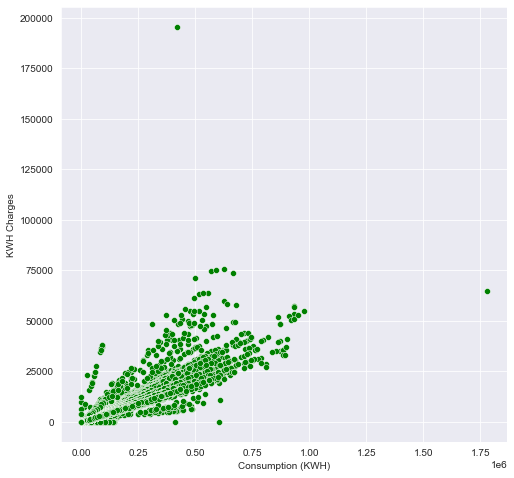

In [12]:
plt.figure(figsize = (8,8))
sns.set_style('darkgrid')
sns.scatterplot(data = nyc_df, x = nyc_df['Consumption (KWH)'], y = nyc_df['KWH Charges'], color = 'green')

## Plot the data distribution of all your numerical columns in histogram and boxplot

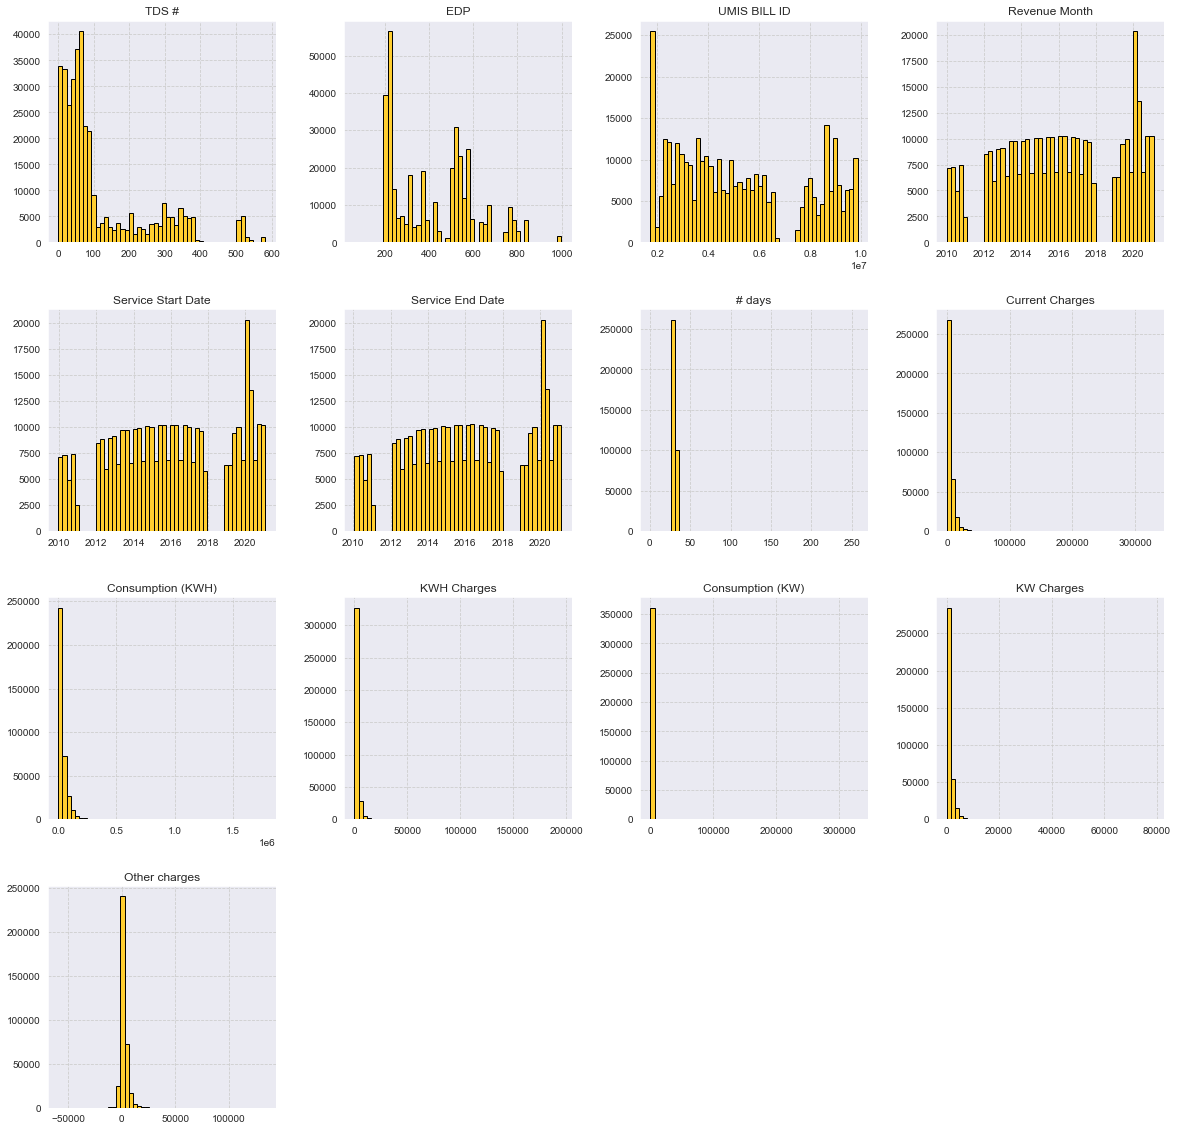

In [13]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
nyc_df.hist(figsize = (20,20),bins=50,color='#ffce30',edgecolor="black")
plt.show()

In [14]:
nyc_df_num = nyc_df.select_dtypes(include = 'number')

In [15]:
nyc_df_num.head()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,118.0,248,1842037,33.0,15396.82,128800.0,7387.97,216.0,2808.0,5200.85
1,118.0,248,1844205,30.0,14556.34,115200.0,6607.87,224.0,2912.0,5036.47
2,118.0,248,1841378,29.0,13904.98,103200.0,5919.55,216.0,2808.0,5177.43
3,118.0,248,1847148,31.0,14764.04,105600.0,6057.22,208.0,2704.0,6002.82
4,118.0,248,1848672,28.0,13729.54,97600.0,5598.34,216.0,2808.0,5323.20


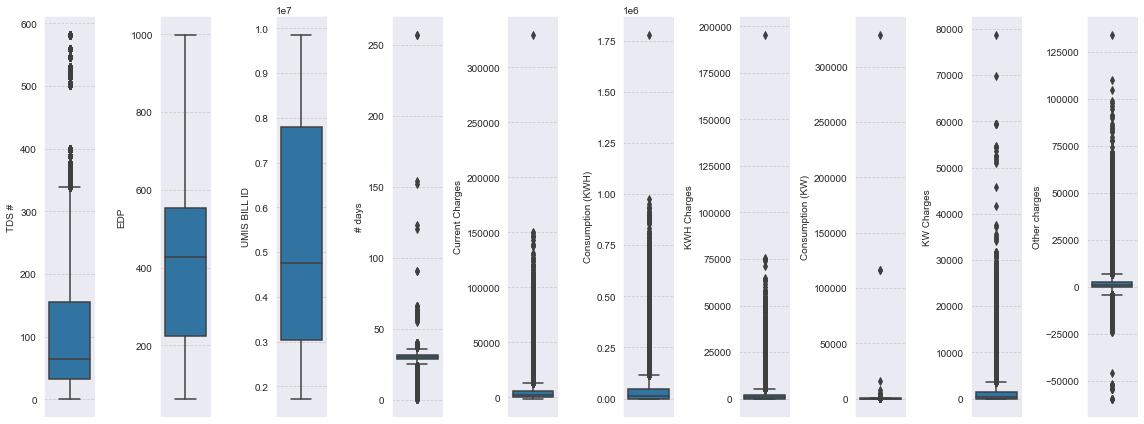

In [16]:
num_cols = nyc_df_num.columns
plt.figure(figsize = (16,6))
for i in range(0, len(nyc_df_num.columns)):
    plt.subplot(1, len(nyc_df_num.columns), i+1) #row, columns, index
    sns.boxplot(y = nyc_df_num[num_cols[i]], orient ='v')
    plt.tight_layout()

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [17]:
nyc_df_new = nyc_df

In [18]:
nyc_df_new['Other charges (^2)'] = nyc_df_new['Other charges'].pow(2)

In [19]:
nyc_df_new.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,...,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges,Other charges (^2)
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1842037,...,2010-01-26,33.0,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85,2.704884e+07
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1844205,...,2010-02-25,30.0,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47,2.536603e+07
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1841378,...,2010-03-26,29.0,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43,2.680578e+07
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1847148,...,2010-04-26,31.0,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82,3.603385e+07
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1848672,...,2010-05-24,28.0,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20,2.833646e+07


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

Data taken from https://s3.amazonaws.com/tripdata/201912-citibike-tripdata.csv.zip

In [20]:
citibikes_df = pd.read_csv('201912-citibike-tripdata.csv')

In [21]:
citibikes_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,602,2019-12-01 00:00:05.5640,2019-12-01 00:10:07.8180,3382,Carroll St & Smith St,40.680611,-73.994758,3304,6 Ave & 9 St,40.668127,-73.983776,41932,Subscriber,1970,1
1,1206,2019-12-01 00:00:10.9630,2019-12-01 00:20:17.8820,362,Broadway & W 37 St,40.751726,-73.987535,500,Broadway & W 51 St,40.762288,-73.983362,18869,Customer,1999,1
2,723,2019-12-01 00:00:11.8180,2019-12-01 00:12:14.8310,146,Hudson St & Reade St,40.716250,-74.009106,238,Bank St & Washington St,40.736197,-74.008592,15334,Subscriber,1997,1
3,404,2019-12-01 00:00:12.2200,2019-12-01 00:06:56.8860,3834,Irving Ave & Halsey St,40.694670,-73.906630,3827,Halsey St & Broadway,40.685650,-73.915640,41692,Customer,1995,1
4,1059,2019-12-01 00:00:14.7230,2019-12-01 00:17:54.1860,500,Broadway & W 51 St,40.762288,-73.983362,3323,W 106 St & Central Park West,40.798186,-73.960591,40156,Subscriber,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955205,93,2019-12-31 23:58:18.0160,2019-12-31 23:59:51.6360,3141,1 Ave & E 68 St,40.765005,-73.958185,3142,1 Ave & E 62 St,40.761227,-73.960940,28734,Subscriber,1985,2
955206,786,2019-12-31 23:58:59.8960,2020-01-01 00:12:06.3460,490,8 Ave & W 33 St,40.751551,-73.993934,513,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1
955207,351,2019-12-31 23:59:03.6950,2020-01-01 00:04:54.8730,3349,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3368,5 Ave & 3 St,40.672815,-73.983524,27746,Subscriber,1935,2
955208,1571,2019-12-31 23:59:21.3610,2020-01-01 00:25:32.9420,252,MacDougal St & Washington Sq,40.732264,-73.998522,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1


User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)

Gender (0 = unknown; 1 = male; 2 = female)

In [22]:
citibikes_df['age'] = 2019-citibikes_df['birth year']

In [23]:
citibikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955210 entries, 0 to 955209
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             955210 non-null  int64  
 1   starttime                955210 non-null  object 
 2   stoptime                 955210 non-null  object 
 3   start station id         955210 non-null  int64  
 4   start station name       955210 non-null  object 
 5   start station latitude   955210 non-null  float64
 6   start station longitude  955210 non-null  float64
 7   end station id           955210 non-null  int64  
 8   end station name         955210 non-null  object 
 9   end station latitude     955210 non-null  float64
 10  end station longitude    955210 non-null  float64
 11  bikeid                   955210 non-null  int64  
 12  usertype                 955210 non-null  object 
 13  birth year               955210 non-null  int64  
 14  gend

## Count the number of missing values of each column

In [24]:
citibikes_df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
age                        0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age

Citi Bike User by Gender

In [25]:
di = {1:'male', 2:'female', 0:'unknown'}

([<matplotlib.patches.Wedge at 0x257656862b0>,
 [Text(-0.7235834841047972, 0.8285088662958068, 'male'),
  Text(0.5891381213353185, -0.9289328683976532, 'female'),
  Text(1.087199748636009, -0.16732216400046707, 'unknown')],
 [Text(-0.3946819004207984, 0.45191392707044, '72.9%'),
  Text(0.32134806618290096, -0.506690655489629, '22.3%'),
  Text(0.5930180447105503, -0.09126663490934565, '4.9%')])

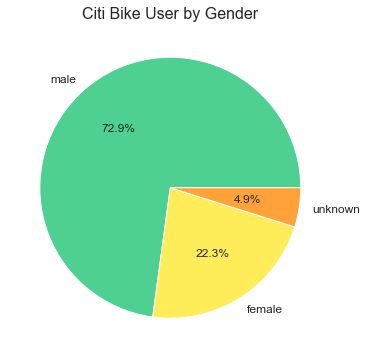

In [26]:
plt.figure(figsize = (6,6))
plt.title('Citi Bike User by Gender', fontsize = 16)
plt.pie(list(citibikes_df['gender'].value_counts()), 
       labels = list(map(di.get, list(citibikes_df['gender'].unique()))),
       colors = ['#4dd091', '#ffec59', '#ffa23a'],
       textprops={'fontsize': 12},
       autopct = '%1.1f%%')

Citi Bike User by User Type

([<matplotlib.patches.Wedge at 0x257741caa00>,
 [Text(-1.0643460400616689, 0.2777904012111371, 'Subscriber'),
  Text(1.064346040061669, -0.2777904012111368, 'Customer')],
 [Text(-0.580552385488183, 0.15152203702425657, '91.9%'),
  Text(0.580552385488183, -0.1515220370242564, '8.1%')])

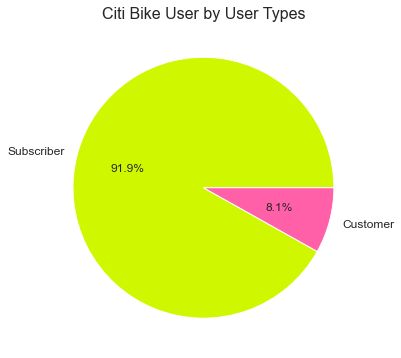

In [27]:
plt.figure(figsize = (6,6))
plt.title('Citi Bike User by User Types', fontsize = 16)
plt.pie(list(citibikes_df['usertype'].value_counts()), 
       labels = list(citibikes_df['usertype'].unique()),
       textprops={'fontsize': 12},
       colors = ['#cff800', '#ff60a8'],
       autopct = '%1.1f%%')

Citi Bike User by Age

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Citi Bike User by Age')

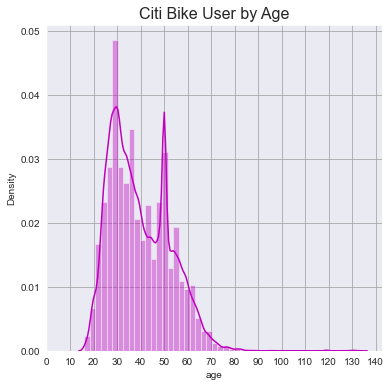

In [28]:
sns.set_style("darkgrid", {"grid.color": ".65"})
plt.figure(figsize = (6,6))
sns.distplot(citibikes_df['age'], color = 'm')
plt.xticks(np.arange(0, 140+1, 10))
plt.title('Citi Bike User by Age', fontsize = 16)

## What is the average number of trips per day?

In [29]:
citibikes_df['starttime'] = pd.to_datetime(citibikes_df['starttime'], format = '%Y-%m-%d %H:%M:%S')
citibikes_df['stoptime'] = pd.to_datetime(citibikes_df['stoptime'], format = '%Y-%m-%d %H:%M:%S')

In [30]:
citibikes_df['date'] = citibikes_df['starttime'].dt.date

In [31]:
average_trips_per_day = citibikes_df.groupby('date').size()

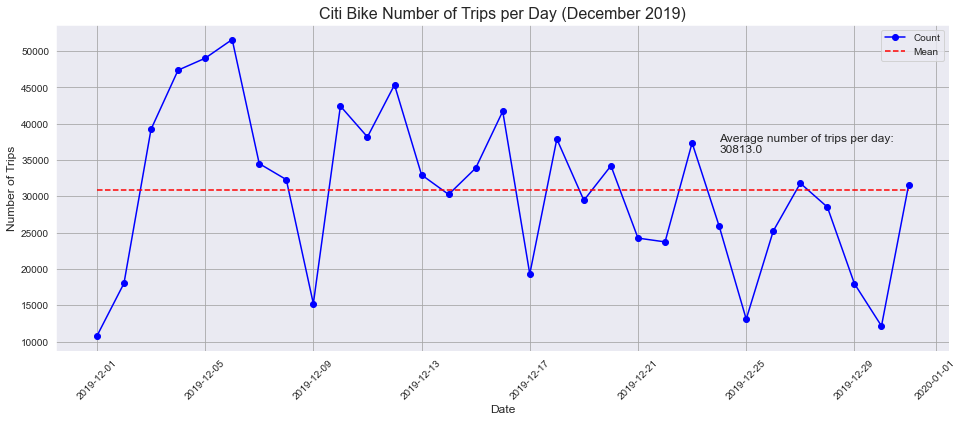

In [32]:
import matplotlib.dates as mdates
plt.figure(figsize = (16,6))
average_trips_per_day.plot(color = 'blue', marker = 'o', label = 'Count')
plt.plot(average_trips_per_day.index,
         [np.mean(average_trips_per_day)]*len(average_trips_per_day), color = 'red', linestyle = '--', label = 'Mean')
plt.text(pd.Timestamp("2019-12-24"), 36000,
         f"Average number of trips per day:\n{np.round(np.mean(average_trips_per_day))}", fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Number of Trips', fontsize = 12)
plt.title('Citi Bike Number of Trips per Day (December 2019)', fontsize = 16)
plt.xticks(rotation = 45)
plt.legend()

## What is the average trip duration?

Average trip duration per ride:

In [33]:
citibikes_df['tripduration'].mean()

830.8396834203998

## What days of the week are most rides taken on?
Process the data and plot your answer

In [34]:
citibikes_df['day name'] = citibikes_df['starttime'].dt.day_name().astype('category')

In [35]:
citibikes_df['day code'] = citibikes_df['starttime'].dt.weekday.astype('category')

Text(0.5, 1.0, 'Citi Bike Rides by Day of the Week')

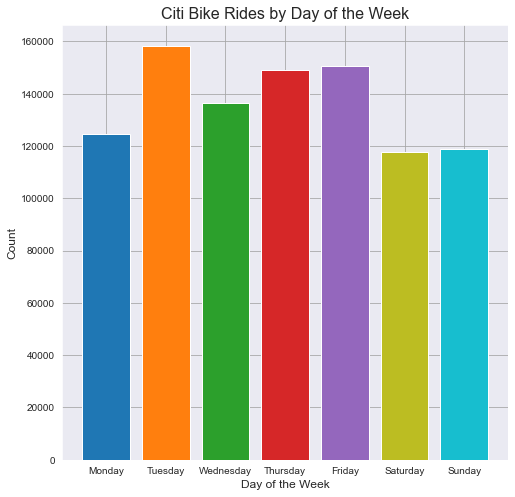

In [36]:
import calendar
plt.figure(figsize = (8,8))
plt.bar(list(calendar.day_name),
       list(citibikes_df.groupby('day code').size()),
       color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:cyan'])
plt.xlabel('Day of the Week', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Citi Bike Rides by Day of the Week', fontsize = 16)

## What hour of the day are most rides taken on?
Process the data and plot your answer

In [37]:
citibikes_df['hour'] = citibikes_df['starttime'].dt.hour

Text(19, 65000, 'Citi Bike ride most taken on: \n 17.00')

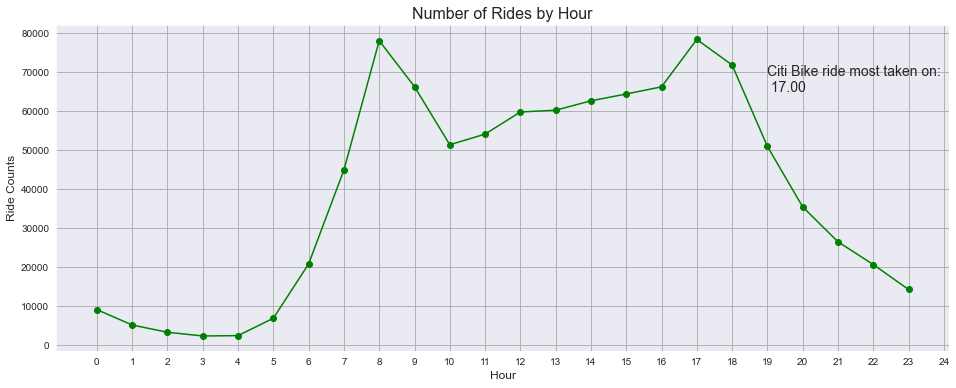

In [38]:
most_ride_hour = citibikes_df.groupby('hour').size().to_frame()
plt.figure(figsize = (16,6))
plt.plot(most_ride_hour, color = 'green', marker = 'o')
plt.xticks(np.arange(0,24+1,1))
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Ride Counts', fontsize = 12)
plt.title('Number of Rides by Hour', fontsize = 16)
hour_ride = list(most_ride_hour.idxmax())
plt.text(19,65000, f'Citi Bike ride most taken on: \n {hour_ride[0]}.00', fontsize = 14)

## Is there correlation between age and trip duration?

<AxesSubplot:>

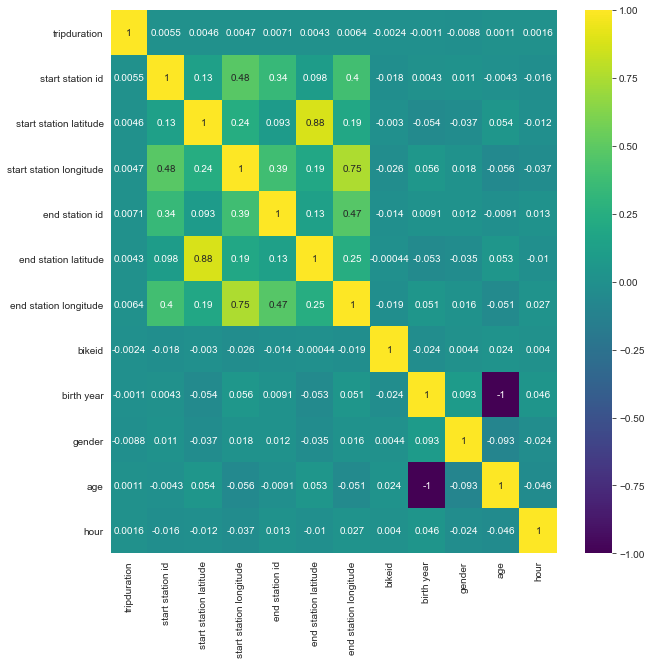

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(citibikes_df.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:>

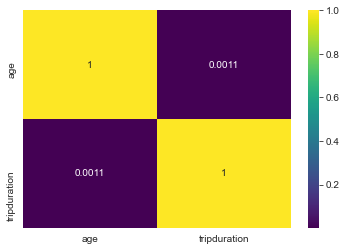

In [40]:
sns.heatmap(citibikes_df[['age', 'tripduration']].corr(), annot = True, cmap = 'viridis')

As higher the age, the trip duration with Citi Bike will be longer (Because the Pearson correlation coefficient is 0.0011)

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [41]:
top_10_pair = citibikes_df.groupby(['start station name', 'end station name']).size().to_frame().sort_values(0, ascending = False).head(10)

In [42]:
top_10_pair = top_10_pair.reset_index(level = ['start station name', 'end station name']).rename(columns = {0:'ride count'})

In [43]:
top_10_pair

,start station name,end station name,ride count
0,E 7 St & Avenue A,Cooper Square & Astor Pl,456
1,W 21 St & 6 Ave,9 Ave & W 22 St,397
2,Broadway & W 60 St,11 Ave & W 59 St,384
3,E 32 St & Park Ave,E 33 St & 1 Ave,351
4,E 6 St & Avenue B,Cooper Square & Astor Pl,336
5,W 22 St & 10 Ave,W 22 St & 8 Ave,290
6,11 Ave & W 41 St,8 Ave & W 33 St,284
7,E 32 St & Park Ave,2 Ave & E 31 St,274
8,11 Ave & W 27 St,W 26 St & 8 Ave,273
9,Vesey Pl & River Terrace,North Moore St & Greenwich St,264


## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."


> Tuesday have the most Citi Bike rides both in rush hour or after work hour

> Null Hypothesis: Tuesday 08.00 have the most Citi Bike rides in rush hour, and Tuesday 17.00 have the most Citi Bike rides in after work hour

## Work with your dataset and show your findings to help answer your question

Text(0.5, 1.0, 'Number of Citi Bike Rides by Day and Hour')

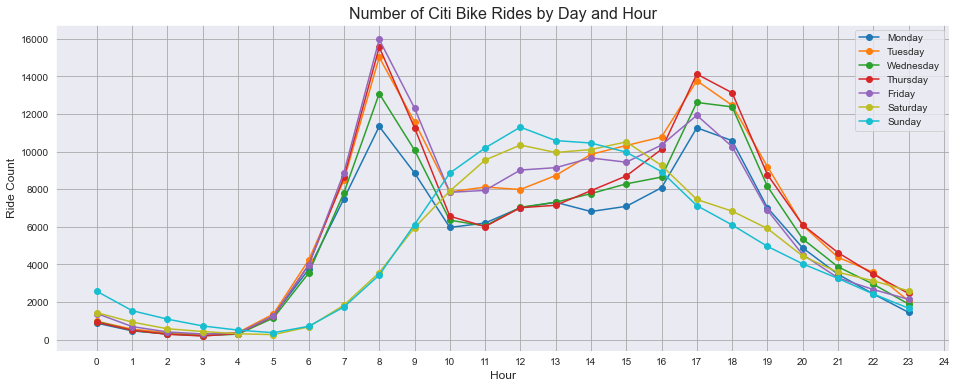

In [45]:
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:cyan']

cal = list(calendar.day_name)

plt.figure(figsize = (16,6))
for i in range(0, len(cal)):
    dat = citibikes_df[citibikes_df['day code'] == i]['hour'].value_counts().to_frame().reset_index().sort_values(by = 'index')
    plt.plot('index', 'hour', data = dat, label = cal[i], color = color[i], marker = 'o')
plt.legend()
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Ride Count', fontsize = 12)
plt.xticks(np.arange(0,24+1,1))
plt.title('Number of Citi Bike Rides by Day and Hour', fontsize = 16)

> Conclusion from data insight:

> Friday 08.00 have the most Citi Bike rides in rush hour, and Thursday 17.00 have the most Citi Bike rides in after work hour

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```